<a href="https://colab.research.google.com/github/KimaniKibuthu/customer-segmentation/blob/main/Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Retail Customer Segmentation

Using customer data, see how you can segment various customers in the business.

## Methodology
1. Data Collection
2. Data exploration and Feature engineering
3. Modelling

## Import Libraries

In [37]:
# General
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Modelling
from sklearn.cluster import KMeans

# Data Collection

In [2]:
# Get data'
from google.colab import files
files.upload()

Saving cust_seg.csv to cust_seg.csv


{'cust_seg.csv': b',Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio\r\n0,1,41,2,6,19,0.124,1.073,0.0,6.3\r\n1,2,47,1,26,100,4.582,8.218,0.0,12.8\r\n2,3,33,2,10,57,6.111000000000001,5.8020000000000005,1.0,20.9\r\n3,4,29,2,4,19,0.6809999999999999,0.516,0.0,6.3\r\n4,5,47,1,31,253,9.308,8.908,0.0,7.2\r\n5,6,40,1,23,81,0.998,7.831,,10.9\r\n6,7,38,2,4,56,0.442,0.45399999999999996,0.0,1.6\r\n7,8,42,3,0,64,0.27899999999999997,3.945,0.0,6.6\r\n8,9,26,1,5,18,0.575,2.215,,15.5\r\n9,10,47,3,23,115,0.653,3.947,0.0,4.0\r\n10,11,44,3,8,88,0.285,5.083,1.0,6.1\r\n11,12,34,2,9,40,0.374,0.266,,1.6\r\n12,13,24,1,7,18,0.526,0.643,0.0,6.5\r\n13,14,46,1,6,30,1.415,3.865,,17.6\r\n14,15,28,3,2,20,0.233,1.6469999999999998,1.0,9.4\r\n15,16,24,1,1,16,0.185,1.287,,9.2\r\n16,17,29,1,1,17,0.132,0.293,0.0,2.5\r\n17,18,43,4,1,26,1.5190000000000001,1.237,0.0,10.6\r\n18,19,44,1,18,61,2.806,3.782,,10.8\r\n19,20,36,1,16,32,0.544,2.944,,10.9\r\n20,21,29,2,6,25,0.585,0.465,0.0,4.2\r\

In [3]:
data = pd.read_csv('/content/cust_seg.csv')

# Data Exploration and Feature Engineering

In this phase, what is important to answer the question: **Who are the various customers that we serve?**

**General Exploration**

In [4]:
# View the data
data.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [5]:
# General info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Customer Id      850 non-null    int64  
 2   Age              850 non-null    int64  
 3   Edu              850 non-null    int64  
 4   Years Employed   850 non-null    int64  
 5   Income           850 non-null    int64  
 6   Card Debt        850 non-null    float64
 7   Other Debt       850 non-null    float64
 8   Defaulted        700 non-null    float64
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 66.5 KB


In [6]:
# Drop ID columns
customer_data = data.drop(['Unnamed: 0', 'Customer Id'], axis=1)

**Missing Values**

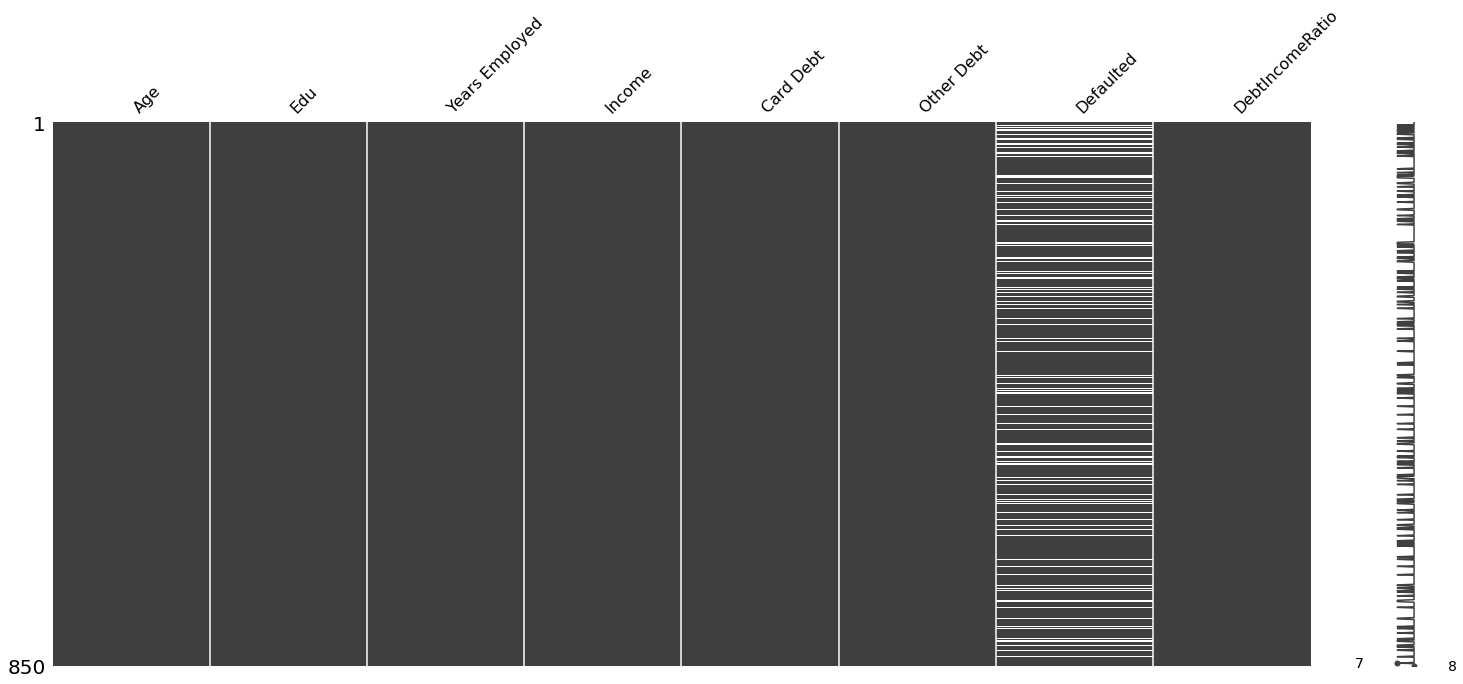

In [8]:
# Inspect the missing values in the defaulted

missingno.matrix(customer_data);

In [11]:
# Fill na with -1 to denote unknown
customer_data['Defaulted'].fillna(-1, inplace=True)

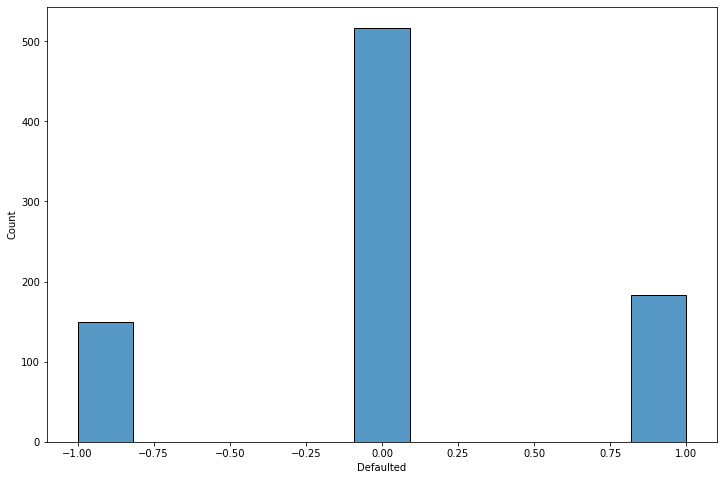

In [12]:
# Explore the column further
plt.figure(figsize=(12, 8))
sns.histplot(data=customer_data['Defaulted']);

**PairPlot & Correlation matrix**

<Figure size 864x576 with 0 Axes>

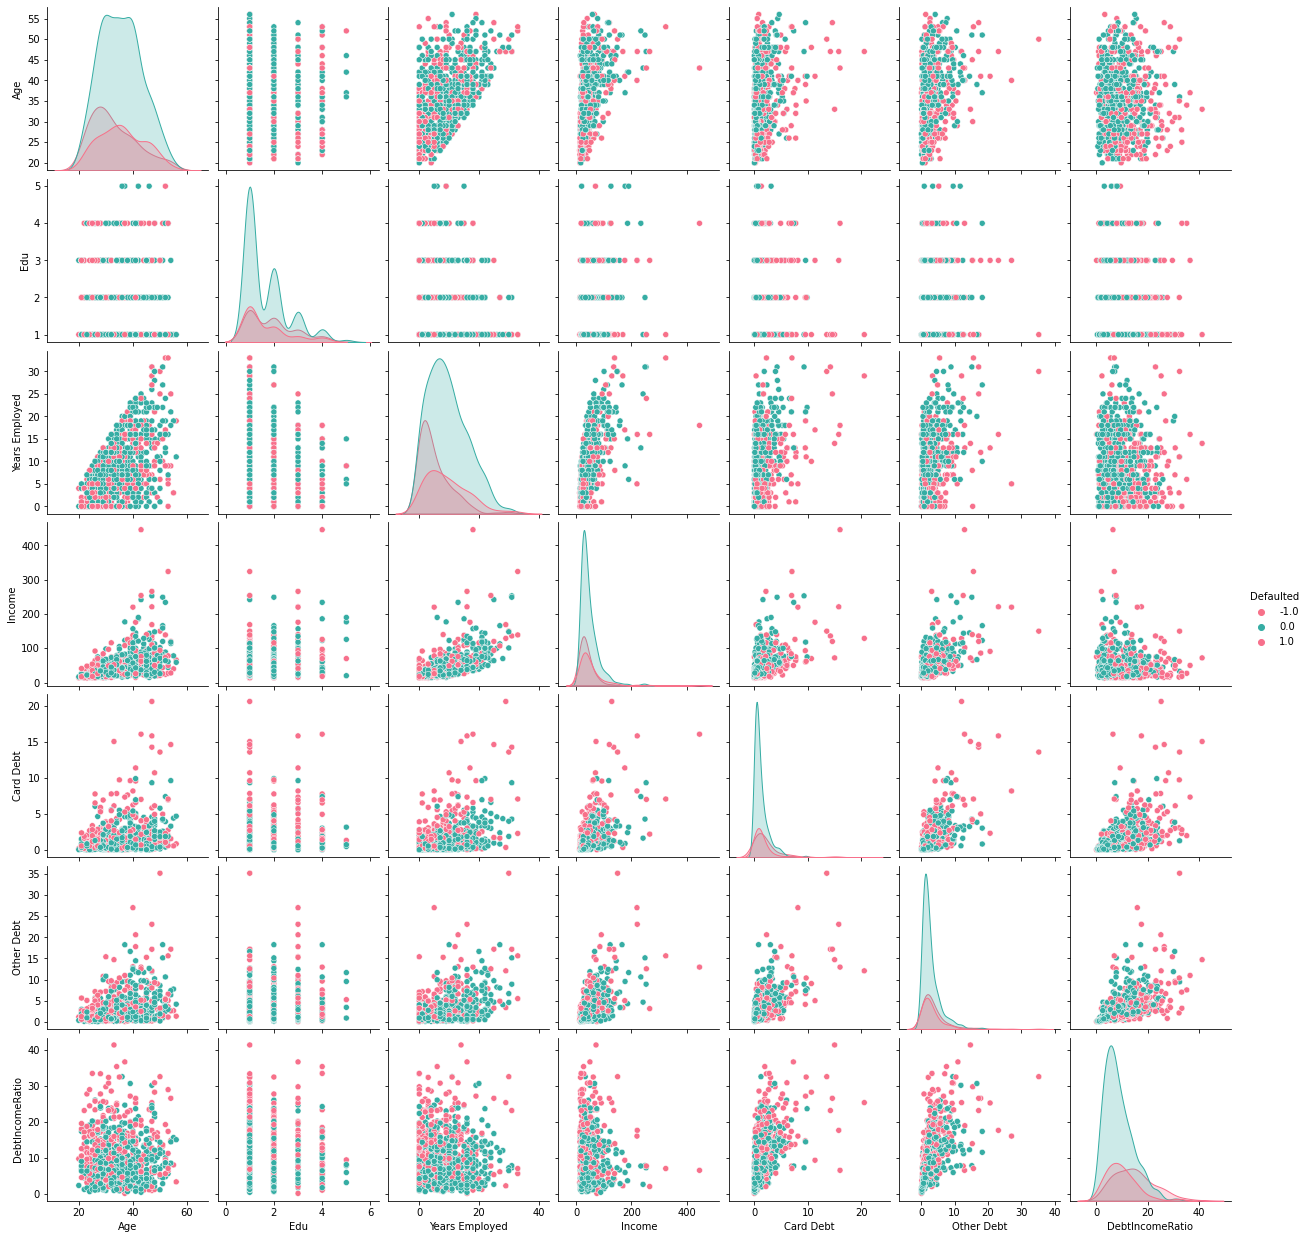

In [13]:
# Plot
plt.figure(figsize=(12, 8))
sns.pairplot(data=customer_data, hue='Defaulted', palette='husl');

It seems that this data cannot be clustered by only two features

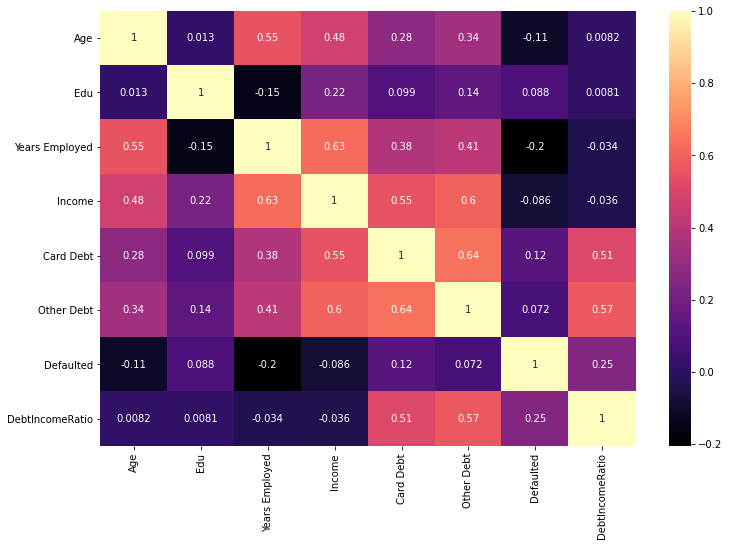

In [16]:
# Correlation matrix
plt.figure(figsize=(12, 8));
sns.heatmap(data=customer_data.corr(), annot=True, cmap='magma');

**Total Debt**

In [17]:
# Create total debt
customer_data['Total_debt'] = customer_data['Card Debt'] + customer_data['Other Debt']

**Subset Data**

In [18]:
subset = customer_data[['Income', 'Total_debt', 'Age', 'Years Employed']]

In [19]:
subset.head()

,Income,Total_debt,Age,Years Employed
0,19,1.197,41,6
1,100,12.800,47,26
2,57,11.913,33,10
3,19,1.197,29,4
4,253,18.216,47,31


<Figure size 864x576 with 0 Axes>

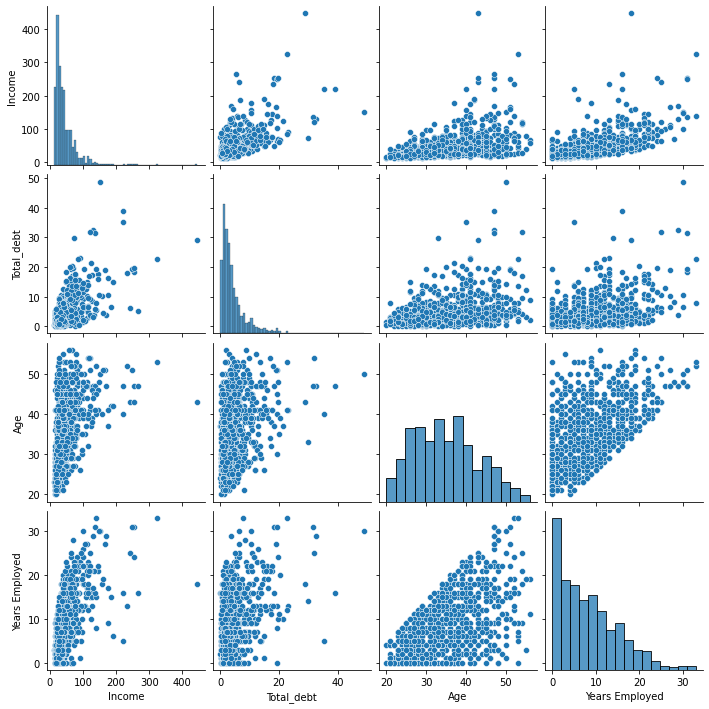

In [21]:
# Pairplot 
plt.figure(figsize=(12, 8));
sns.pairplot(data=subset, palette='husl');

In [22]:
# Apply log transformation to the skewed data
columns = ['Income', 'Total_debt', 'Years Employed']

for column in columns:
  subset[f'log_{column}'] = np.log1p(subset[column])

subset.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Income,Total_debt,Age,Years Employed,log_Income,log_Total_debt,log_Years Employed
0,19,1.197,41,6,2.995732,0.787093,1.945910
1,100,12.800,47,26,4.615121,2.624669,3.295837
2,57,11.913,33,10,4.060443,2.558235,2.397895
3,19,1.197,29,4,2.995732,0.787093,1.609438
4,253,18.216,47,31,5.537334,2.955743,3.465736


In [27]:
# MinMaxScale aGe
scaler = MinMaxScaler()
subset['scaled_age'] = scaler.fit_transform(subset[['Age']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
subset.head()

,Income,Total_debt,Age,Years Employed,log_Income,log_Total_debt,log_Years Employed,scaled_age
0,19,1.197,41,6,2.995732,0.787093,1.945910,0.583333
1,100,12.800,47,26,4.615121,2.624669,3.295837,0.750000
2,57,11.913,33,10,4.060443,2.558235,2.397895,0.361111
3,19,1.197,29,4,2.995732,0.787093,1.609438,0.250000
4,253,18.216,47,31,5.537334,2.955743,3.465736,0.750000


In [29]:
data_final = subset[['log_Income', 'log_Total_debt', 'log_Years Employed', 'scaled_age']]

<Figure size 864x576 with 0 Axes>

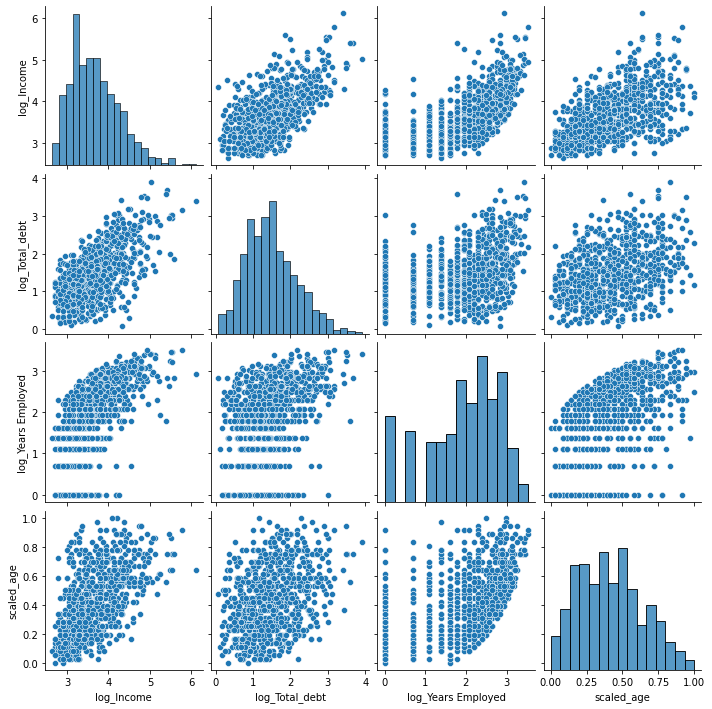

In [31]:
# Pairplot 
plt.figure(figsize=(12, 8));
sns.pairplot(data=data_final, palette='husl');

# Modelling

**Optimum Clusters**

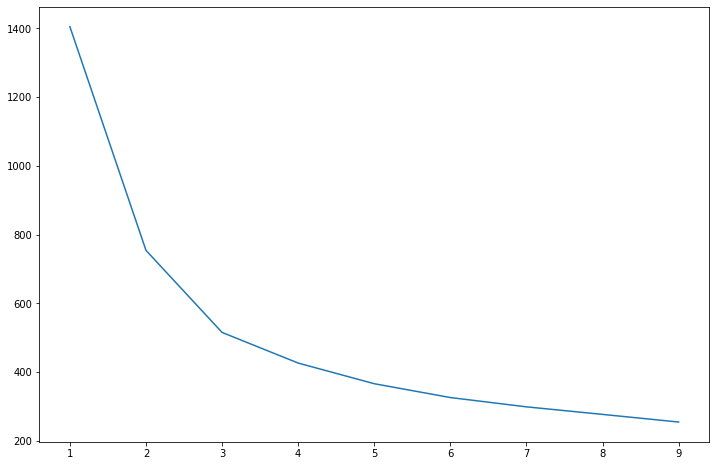

In [33]:
# Initialize empty lists
inertias = []
clusters = list(range(1,10))

# Loop
for cluster in clusters:
  kmeans = KMeans(cluster)
  kmeans.fit(data_final)
  inertias.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(12,8))
sns.lineplot(x=clusters, y=inertias)

The number of optimum clusters is **three**

**Modelling with 3 Clusters**

In [34]:
# Initialize model
kmeans = KMeans(3)

# Fit and Predict
labels = kmeans.fit_predict(data_final)

In [43]:
# Save labels to data

data_preliminary = data_final.copy()

data_preliminary['labels'] = labels
data_preliminary['defaulted'] = customer_data['Defaulted']

**Visualize**

In [44]:
data_preliminary.head()

,log_Income,log_Total_debt,log_Years Employed,scaled_age,labels,defaulted
0,2.995732,0.787093,1.945910,0.583333,0,0.0
1,4.615121,2.624669,3.295837,0.750000,1,0.0
2,4.060443,2.558235,2.397895,0.361111,1,1.0
3,2.995732,0.787093,1.609438,0.250000,0,0.0
4,5.537334,2.955743,3.465736,0.750000,1,0.0


In [39]:
# Visualize

fig = px.scatter_3d(data_preliminary,
                    x="log_Income",
                    y="log_Total_debt",
                    z="log_Years Employed",
                    color='labels'
                    )

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [51]:
data_preliminary.groupby('labels').mean()

,log_Income,log_Total_debt,log_Years Employed,scaled_age,defaulted
labels,,,,,
0,3.489277,1.156327,2.096405,0.391280,-0.058228
1,4.320067,2.192781,2.724473,0.576606,0.003906
2,3.182985,1.186121,0.606933,0.264796,0.276382


The three types of people are:
1. The ones with a high income, high debt , older and had been employed for long.

2. The ones with average income, low debt, had been employed for a while and were middle aged.

3. The ones with slightly lower than average income, higher debt compared to the ones with slightly higher income and a young age.

**Who were more likely to default on a loan**

In [52]:
xeros = data_preliminary.loc[data_preliminary['defaulted']==0, 'labels']
ones = data_preliminary.loc[data_preliminary['defaulted']==1, 'labels']

In [59]:
xeros.value_counts(normalize=True)

0    0.526112
1    0.307544
2    0.166344
Name: labels, dtype: float64

In [58]:
ones.value_counts(normalize=True)

2    0.459016
0    0.273224
1    0.267760
Name: labels, dtype: float64

**Conclusion**

The average age were more likely to default compared to the rest of the group while the youngest aged group were more likely to pay their debt